In [2]:
import glob

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

pd.options.display.max_rows = 10

plt.style.use('ggplot')
font = {'family': 'IPAexGothic'}
matplotlib.rc('font', **font)

In [3]:
# CSVファイルからデータを読み込む

# '170301' などの日付文字列を日付オブジェクトに変換
# （参考）http://qiita.com/TomokIshii/items/ff14771ac0e77632969a
date_parser = lambda d: pd.datetime.strptime(d, '%y%m%d')
df = pd.read_csv(
    '/Users/akiyoko/PycharmProjects/marketstat/downloads/boj/2016/160301.csv',
    index_col='date', parse_dates=True, date_parser=date_parser,
    na_values=' ',  # たまに「name」列に ' ' が入っているので NaN に変換
)
df

,expected_value,preliminary_value,name,confirmed_value
date,,,,
2016-03-01,NaN,NaN,NaN,NaN
2016-03-01,0.0,-100,銀行券要因,NaN
2016-03-01,-7200.0,-10000,財政等要因,NaN
2016-03-01,-7200.0,-10100,資金過不足,NaN
2016-03-01,6000.0,6000,NaN,NaN
...,...,...,...,...
2016-03-01,NaN,NaN,マネタリーベース,NaN
2016-03-01,NaN,積み期間（2/16～3/15日）の所要準備額（積数）,積み期間（2/16～3/15日）の所要準備額（積数）,1917300.0
2016-03-01,NaN,積み期間（2/16～3/15日）の所要準備額（1日平均）,積み期間（2/16～3/15日）の所要準備額（1日平均）,66100.0


In [4]:
# 特定の列が NaN の行を除外

# 「name」列や「preliminary_value」列が NaN の行を除外（不要なので）
# （参考）http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
df = df.dropna(subset=['name', 'preliminary_value'])
df

,expected_value,preliminary_value,name,confirmed_value
date,,,,
2016-03-01,0.0,-100,銀行券要因,NaN
2016-03-01,-7200.0,-10000,財政等要因,NaN
2016-03-01,-7200.0,-10100,資金過不足,NaN
2016-03-01,13100.0,+12900,合計,NaN
2016-03-01,5900.0,+2800,当座預金増減,NaN
2016-03-01,NaN,2592700,当座預金残高,NaN
2016-03-01,NaN,積み期間（2/16～3/15日）の所要準備額（積数）,積み期間（2/16～3/15日）の所要準備額（積数）,1917300.0
2016-03-01,NaN,積み期間（2/16～3/15日）の所要準備額（1日平均）,積み期間（2/16～3/15日）の所要準備額（1日平均）,66100.0
2016-03-01,NaN,3/2日以降の残り要積立額（積数）,3/2日以降の残り要積立額（積数）,3300.0


In [5]:
# 特定条件の行だけを抽出

# 「name」列が 「当座預金残高」になっている行だけに絞る
df = df[df['name'] == '当座預金残高']
df

,expected_value,preliminary_value,name,confirmed_value
date,,,,
2016-03-01,NaN,2592700,当座預金残高,NaN


In [6]:
# 特定の列だけを抽出

# 「expected_value」列と「confirmed_value」列を除外（不要なので）
# （参考）http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
df = df.drop(['expected_value', 'confirmed_value', 'name'], axis=1)
df

# 以下のように残すカラムだけ指定しても、同じ結果が得られる
# df = df[['preliminary_value']]

,preliminary_value
date,
2016-03-01,2592700


In [7]:
# ラベル名を変更

# column名を「preliminary_value」から「当座預金残高」に変更する
# （参考）https://nkmk.github.io/blog/python-pandas-dataframe-rename/
df = df.rename(columns={'preliminary_value': u'当座預金残高'})

# index名を「Date」に変更する
df.index.names = ['Date']
df

,当座預金残高
Date,
2016-03-01,2592700


In [8]:
df[u'当座預金残高']

Date
2016-03-01    2592700
Name: 当座預金残高, dtype: object

In [9]:
# 値を int型に変換

# object型のままだとグラフにできないので int型に変換
# （参考）http://sinhrks.hatenablog.com/entry/2014/12/06/233032
df[u'当座預金残高'] = df[u'当座預金残高'].astype(int)
df[u'当座預金残高']

Date
2016-03-01    2592700
Name: 当座預金残高, dtype: int64

,当座預金残高
Date,
2016-01-04,2535400
2016-01-05,2549000
2016-01-06,2538800
2016-01-07,2520100
2016-01-08,2534900
...,...
2017-03-09,3265200
2017-03-10,3280200
2017-03-13,3263700


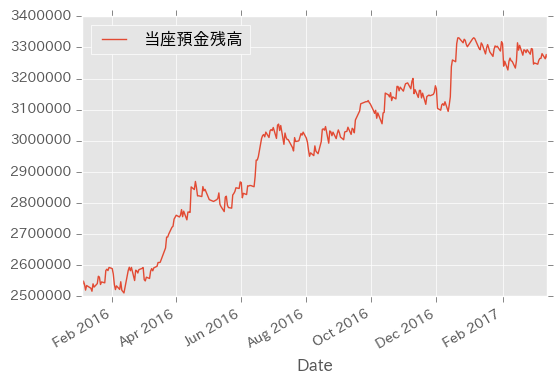

In [10]:
# 時系列データ（日銀の当座預金残高）を読み込む
df_boj = pd.DataFrame()
date_parser = lambda d: pd.datetime.strptime(d, '%y%m%d')
paths = glob.glob('/Users/akiyoko/PycharmProjects/marketstat/downloads/boj/201[67]/*.csv')
for path in paths:
    df = pd.read_csv(path,
                     index_col='date', parse_dates=True, date_parser=date_parser,
                     na_values=' ')
    # 「name」列や「preliminary_value」列が NaN の行を除外
    df = df.dropna(subset=['name', 'preliminary_value'])
    # 「name」列が「当座預金残高」になっている行だけに絞る
    df = df[df['name'] == '当座預金残高']
    # 「expected_value」列と「confirmed_value」列を除外
    df = df.drop(['expected_value', 'confirmed_value', 'name'], axis=1)
    # column名を「preliminary_value」から「当座預金残高」に変更
    df = df.rename(columns={'preliminary_value': u'当座預金残高'})
    # index名を「Date」に変更する
    df.index.names = ['Date']
    # object型のままだとグラフにできないので int型に変換
    df[u'当座預金残高'] = df[u'当座預金残高'].astype(int)
    # 行を末尾に追加
    df_boj = df_boj.append(df)

# なお、column数が1つだけの場合はyオプションは不要
df_boj.plot()
df_boj

,日経平均株価（終値）
Date,
2016-01-04,18450.980469
2016-01-05,18374.000000
2016-01-06,18191.320312
2016-01-07,17767.339844
2016-01-08,17697.960938
...,...
2016-12-26,19396.640625
2016-12-27,19403.060547
2016-12-28,19401.720703


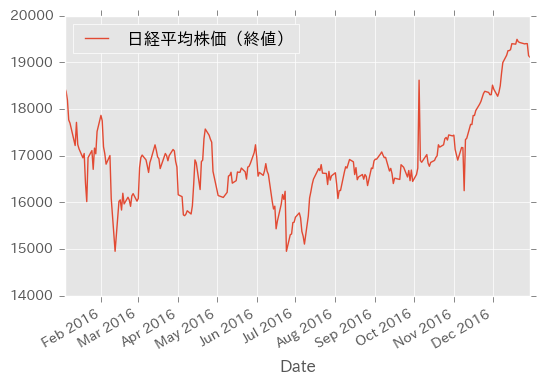

In [11]:
# 時系列データ（日経平均株価）を読み込む
df_n225 = pd.read_csv('n225.csv', index_col='Date', parse_dates=True, usecols=['Date', 'Adj Close'])
df_n225 = df_n225.sort_index()
df_n225 = df_n225.rename(columns={'Adj Close': u'日経平均株価（終値）'})
df_n225.plot()
df_n225

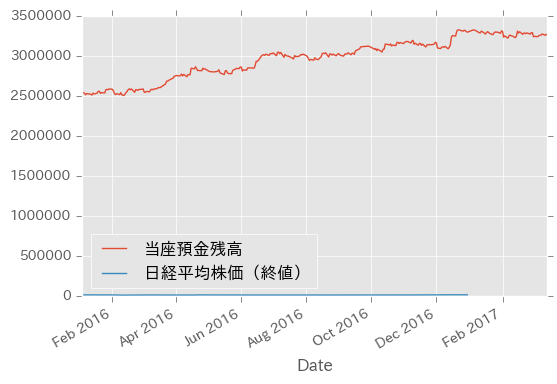

In [12]:
# 二つのグラフを同じ図に表示
ax = df_boj.plot()
df_n225.plot(ax=ax)

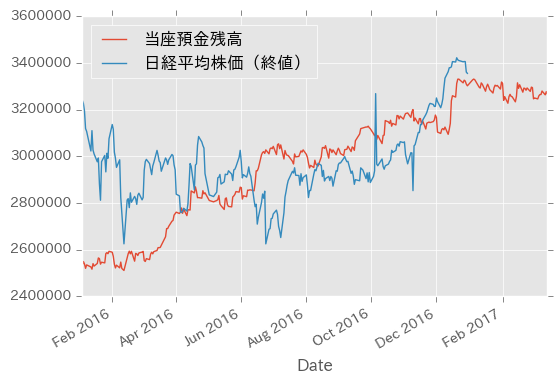

In [13]:
# 見やすいように倍率を調整してみる
adj = df_boj[u'当座預金残高'].mean() / df_n225[u'日経平均株価（終値）'].mean()
ax = df_boj.plot()
(df_n225 * adj).plot(ax=ax)

,当座預金残高,日経平均株価（終値）
2016-01-01,NaN,NaN
2016-01-02,NaN,NaN
2016-01-03,NaN,NaN
2016-01-04,2535400.0,3.239341e+06
2016-01-05,2549000.0,3.225826e+06
...,...,...
2016-12-27,3326500.0,3.406492e+06
2016-12-28,3322800.0,3.406257e+06
2016-12-29,3309600.0,3.361211e+06
2016-12-30,3302400.0,3.355808e+06


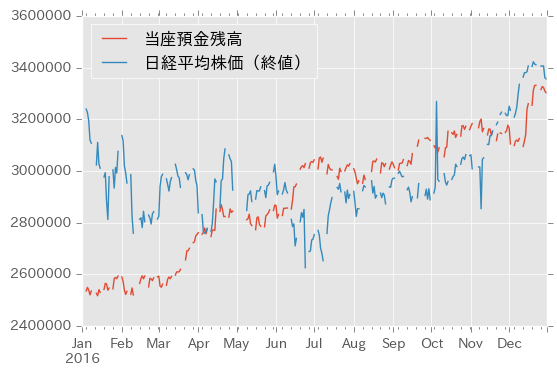

In [14]:
# 期間を合わせてみる
start_date = '2016-01-01'
end_date = '2016-12-31'
span = pd.date_range(start_date, end_date)
df_2016 = pd.DataFrame(index=span)
df_2016 = df_2016.join(df_boj[start_date:end_date])
df_2016 = df_2016.join(df_n225[start_date:end_date] * adj)
df_2016.plot()
df_2016